# Importing the libraries

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Importing the dataset

In [26]:
data = pd.read_csv('twitter_training.csv', header = None, names = ['ID', 'Company', 'Sentiment','Review'])

# Analysing the dataset

In [27]:
data.head()

,ID,Company,Sentiment,Review
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [28]:
data.tail()

,ID,Company,Sentiment,Review
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...
74681,9200,Nvidia,Positive,Just like the windows partition of my Mac is l...


In [72]:
data['Sentiment'].value_counts()

Sentiment
Negative      22358
Positive      20655
Neutral       18108
Irrelevant    12875
Name: count, dtype: int64

In [29]:
data.shape

(74682, 4)

In [30]:
data.describe()

,ID
count,74682.000000
mean,6432.586165
std,3740.427870
min,1.000000
25%,3195.000000
50%,6422.000000
75%,9601.000000
max,13200.000000


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         74682 non-null  int64 
 1   Company    74682 non-null  object
 2   Sentiment  74682 non-null  object
 3   Review     73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [32]:
data.columns

Index(['ID', 'Company', 'Sentiment', 'Review'], dtype='object')

# Checking for missing values

In [33]:
missing = data.isna().sum()
missing

ID             0
Company        0
Sentiment      0
Review       686
dtype: int64

# Removing rows which has missing values

In [34]:
data = data.dropna()

In [35]:
data.isna().sum()

ID           0
Company      0
Sentiment    0
Review       0
dtype: int64

# Data cleaning

In [36]:
data = data.drop(columns = ['ID','Company'])

In [37]:
import re
import nltk
from nltk.corpus import stopwords
nltk.download ('stopwords')
nltk.download ('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\VENKAT\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\VENKAT\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [38]:
from nltk.stem import WordNetLemmatizer
corpus = []
stopwords = stopwords.words('english')
for i in range (0,73996):
  lemma = WordNetLemmatizer()
  review = re.sub('[^a-zA-Z]',' ',data['Review'].iloc[i])
  review = review.lower()
  review = review.split()
  review = [lemma.lemmatize(word) for word in review if not word in set(stopwords)]
  review = ' '.join(review)
  corpus.append(review)

# Creating the bag of words model

In [39]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
vectorizer = TfidfVectorizer()
x = vectorizer.fit_transform(corpus).toarray()
y = data['Sentiment']

# Splitting the dataset into training and testing sets

In [40]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.1, random_state = 0)

In [79]:
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [80]:
x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [81]:
y_train

18022    Negative
56019    Negative
4905      Neutral
18003    Negative
8454     Positive
           ...   
21433    Positive
46336     Neutral
43024    Negative
43995    Positive
68876    Positive
Name: Sentiment, Length: 66596, dtype: object

In [82]:
y_test

763        Negative
71640      Negative
15332       Neutral
34463      Negative
41571      Negative
            ...    
9108     Irrelevant
6216     Irrelevant
65725       Neutral
68363      Positive
4700        Neutral
Name: Sentiment, Length: 7400, dtype: object

In [42]:
len(x[0])

26655

# Training the classification model

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
model = LogisticRegression(multi_class = 'multinomial')
model.fit(x_train,y_train)

LogisticRegression(multi_class='multinomial')

# Evaluating the model

In [133]:
result = model.predict(x_test)
result = pd.DataFrame(result)
result.value_counts()

0         
Negative      2389
Positive      2369
Neutral       1595
Irrelevant    1047
Name: count, dtype: int64

In [50]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, model.predict(x_test)))

0.7812162162162162


In [52]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, model.predict(x_test))
cm

array([[ 860,  133,   97,  191],
       [  54, 1911,  101,  203],
       [  62,  188, 1277,  242],
       [  71,  157,  120, 1733]], dtype=int64)

# Visualizing the result

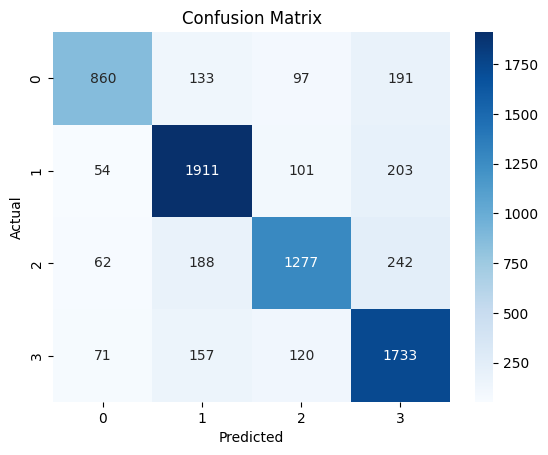

In [53]:
import seaborn as sns
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Feeding own positive review

Cleaning

In [119]:
new_corpus = []
new_review = "Oh man I fuckin love playing this game, I hope y'all enjoy this fuckin masterpiece and this game is one of a kind"
new_review = re.sub('[^a-zA-Z]', ' ', new_review)
new_review = new_review.lower()
new_review = new_review.split()
new_review = [lemma.lemmatize(word) for word in new_review if not word in set(stopwords)]
new_review = ' '.join(new_review)
new_corpus.append(new_review)
new_corpus

['oh man fuckin love playing game hope enjoy fuckin masterpiece game one kind']

Creating the bag of words model

In [120]:
new_x = vectorizer.transform(new_corpus)
new_y = model.predict(new_x)
new_x.shape

(1, 26655)

Predicting the result

In [121]:
if new_y == 'Positive':
    print('The review is positive, the user likes this particular game/topic')
if new_y == 'Neutral':
    print("The review is neutral, the user stays neutral about this particular game/topic")
if new_y == 'Irrelevant':
    print("The user's statement is irrelevant")
if new_y == 'Negative':
    print("The review is negative, The user doesn't like this particular game/topic")

The review is positive, the user likes this particular game/topic


This review is my own making, My intention was to give a positive feedback on this game which the model predicted correctly and classified my feedback as positive which made me happy ;-)

# Feeding my own negative review

Cleaning the review

In [125]:
new_corpus = []
new_review = "I regret wasting my money on this shitty game. I don't know how people even play these kinda game"
new_review = re.sub('[^a-zA-Z]', ' ', new_review)
new_review = new_review.lower()
new_review = new_review.split()
new_review = [lemma.lemmatize(word) for word in new_review if not word in set(stopwords)]
new_review = ' '.join(new_review)
new_corpus.append(new_review)
new_corpus

['regret wasting money shitty game know people even play kinda game']

Creating the bag of words model

In [126]:
new_x = vectorizer.transform(new_corpus)
new_y = model.predict(new_x)
new_x.shape

(1, 26655)

Predicting the result

In [127]:
if new_y == 'Positive':
    print('The review is positive, the user likes this particular game/topic')
if new_y == 'Neutral':
    print("The review is neutral, the user stays neutral about this particular game/topic")
if new_y == 'Irrelevant':
    print("The user's statement is irrelevant")
if new_y == 'Negative':
    print("The review is negative, The user doesn't like this particular game/topic")

The review is negative, The user doesn't like this particular game/topic


This review is my own making, I intended to give a negative feedback for a particular game, and the result was also matching my thought as the result classified my feedback as negative

# The model training part alone took almost an hour to get executed